In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



s3= boto3.resource('s3')
bucket_name= 'morgangant-bata-445-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'weather.csv'

bucket_object= bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datefile
weather = pd.read_csv(file_content_stream)
weather.head()

Matplotlib is building the font cache; this may take a moment.


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [2]:
#deleting rows after 2011-10-31
weather=weather.drop(weather.index[117793:])

In [3]:
len(weather)

117793

In [4]:
weather= weather.dropna()

In [5]:
len(weather)

117759

In [6]:
#Setting input variables
weather= weather.drop(columns= ['rowID', 'hpwren_timestamp', 'min_wind_direction', 'min_wind_speed', 'rain_accumulation', 'rain_duration'], axis= 1)

In [7]:
## scaling 
scaler = MinMaxScaler()
x = scaler.fit_transform(weather)

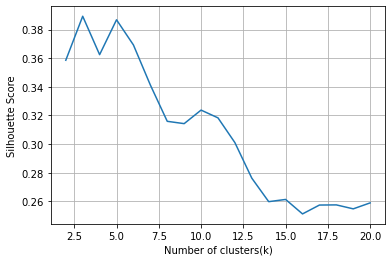

In [8]:
## defining a lists to store silhouette scores
silhouette = list()

for i in range (2,21):
    ##clustering the data into i clusters
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(x)
    kmeans_md_labels = kmeans_md.labels_
    
    ##computing the silhouette score
    score = silhouette_score(x, kmeans_md_labels)
    silhouette.append(score)
    
##visualizing the results
plt.plot(range(2,21), silhouette)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show();

In [ ]:
#The number of clusters the Sill test recommends is about 3 clusters

In [11]:
#Clustering the data
three_clusters= KMeans(n_clusters= 3, n_init= 20).fit(x)

#Append cluster labels 
weather['cluster']= three_clusters.labels_
weather.head(10)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,cluster
1,912.3,63.86,161.0,0.8,215.0,1.5,39.9,2
2,912.3,64.22,77.0,0.7,143.0,1.2,43.0,0
3,912.3,64.40,89.0,1.2,112.0,1.6,49.5,0
4,912.3,64.40,185.0,0.4,260.0,1.0,58.8,2
5,912.3,63.50,76.0,2.5,92.0,3.0,62.6,0
6,912.3,62.78,79.0,2.4,89.0,2.7,65.6,0
7,912.3,62.42,86.0,2.0,92.0,2.4,65.2,0
8,912.3,62.24,105.0,1.4,125.0,1.9,65.8,1
9,912.3,62.24,93.0,0.4,126.0,0.7,58.6,0
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5,2


In [ ]:
#Describing the clusters
#0: Middle average wind directions and middle max wind direction
#1: Lower average wind directions and middle/lowest max wind direction (intertwince with cluster 0?)
#2: Highest average wind directions and highest max wind direction

#These cluster relationships aren't very distict, the values
    #have a close range. And for as many variables as we are using, I feel 
    #as though we should a better relationship between more variables
    #and the cluster. 
    #Note: This may be becasue we are only using 2 months of the collected
        #data and the weather might not vary too much during this time, depening
        #on many factors. If we open up our data to more of what was recorded,
        #we might be able to see more specific relationships. 
    